In [2099]:
import pandas as pd
import matplotlib.pyplot as plt

In [2100]:
#Use this to check if you can eliminate certain months
#powerOutages = pd.DataFrame(df.loc[:,['DATE','Power Outage']]);
#plt.plot_date(powerOutages['DATE'],powerOutages['Power Outage']);
# plt.show()

In [2101]:
df = pd.read_csv('Final Data');
df.head()

,Average Wind Speed,PRCP,TMIN,Fastest 5 second wind speed,Fog/Ice,Heavy/Freezing Fog,Thunder,Smoke/Haze,Power Outage
0,11.41,0.14,4.0,35.1,1.0,0.0,0.0,1.0,0.0
1,8.50,0.00,26.0,25.1,0.0,0.0,0.0,0.0,1.0
2,9.17,0.00,45.0,30.0,0.0,0.0,0.0,0.0,0.0
3,2.91,0.00,70.0,18.1,1.0,1.0,0.0,1.0,1.0
4,16.33,0.44,34.0,42.9,0.0,0.0,0.0,0.0,0.0


In [2102]:
import numpy as np
from sklearn.cross_validation import train_test_split


In [2103]:
df.describe()

,Average Wind Speed,PRCP,TMIN,Fastest 5 second wind speed,Fog/Ice,Heavy/Freezing Fog,Thunder,Smoke/Haze,Power Outage
count,318.000000,318.000000,318.000000,318.000000,318.000000,318.000000,318.000000,318.000000,318.000000
mean,7.932956,0.095786,39.827044,30.706289,0.374214,0.103774,0.106918,0.179245,0.500000
std,4.119541,0.234191,19.021115,17.701957,0.484682,0.305447,0.309496,0.384162,0.500788
min,0.000000,0.000000,-8.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.920000,0.000000,26.000000,21.225000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.160000,0.000000,42.000000,25.900000,0.000000,0.000000,0.000000,0.000000,0.500000
75%,10.070000,0.050000,56.000000,34.825000,1.000000,0.000000,0.000000,0.000000,1.000000
max,22.150000,1.760000,73.000000,181.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [2104]:
#Split the data into X and Y, and then into training and testing sets
#X_raw = np.array(shuffledFinalData.iloc[:,1:11]);
X_raw = np.array(df.iloc[:,0:7]);
X_raw = preprocessing.MaxAbsScaler().fit_transform(X_raw);

y = np.array(df['Power Outage']);
X_train, X_test, y_train, y_test = train_test_split(X_raw, y, test_size=0.2, random_state = 20);

In [2105]:
#Import KNN Classifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score

In [2106]:
knn = KNeighborsClassifier(n_neighbors=5, weights='distance')

In [2107]:
knn.fit(X_train, y_train);

In [2108]:
pred = knn.predict(X_test);

In [2109]:
accuracy = accuracy_score(y_test, pred);

In [2110]:
print("Accuracy: ", accuracy);

Accuracy:  0.609375


In [2111]:
#Calculate how many Power outages were predicted correctly
actualOutage = set(np.nonzero(y_test)[0]);
predictedOutage = set(np.nonzero(pred)[0]);
accuratePrediction = predictedOutage.intersection(actualOutage);
if len(accuratePrediction)>len(actualOutage):
    accuracyPredictionPercentage = 100;
else:
    accuracyPredictionPercentage = len(accuratePrediction)/len(actualOutage)*100;
print("Out of the number of actual ones, it predicted : ", accuracyPredictionPercentage);


Out of the number of actual ones, it predicted :  66.66666666666666


In [2112]:
#Calculate how many days were classified as normal days
noOutage = set(np.where(y_test == 0)[0])
predictedNoOutage = set(np.where(pred == 0)[0])
accuratePredictionNoOutage = predictedNoOutage.intersection(noOutage);
if len(accuratePredictionNoOutage)>len(noOutage):
    accuratePredictionNoOutagePercentage = 100
else:
    accuratePredictionNoOutagePercentage = len(accuratePredictionNoOutage)/len(noOutage)*100;
print("Out of the number of normal days, it predicted : ", accuratePredictionNoOutagePercentage);

Out of the number of normal days, it predicted :  55.88235294117647


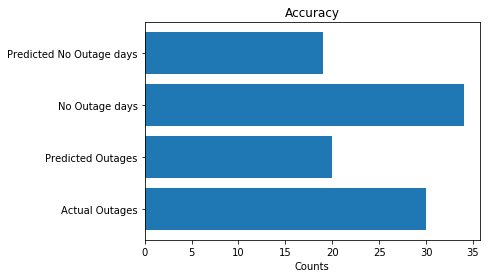

In [2113]:
#Plot graphs of accuracy
plt.barh([1,2,3,4], [len(actualOutage),len(accuratePrediction),len(noOutage),len(accuratePredictionNoOutage)]);
plt.yticks([1,2,3,4],['Actual Outages','Predicted Outages','No Outage days','Predicted No Outage days'])
plt.xlabel('Counts');
plt.title('Accuracy');
plt.show()

In [2114]:
checkKValue = list(range(1,50))
neighbors = list(filter(lambda x: x % 2 !=0, checkKValue))
cv_scores = []
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k, weights='distance')
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

In [2115]:
MSE = [1-x for x in cv_scores]
optimalK = neighbors[MSE.index(min(MSE))]
print("Optimal K value is : ", optimalK);
print("Misclassification error at that value is ", min(MSE));

Optimal K value is :  9
Misclassification error at that value is  0.375076923077


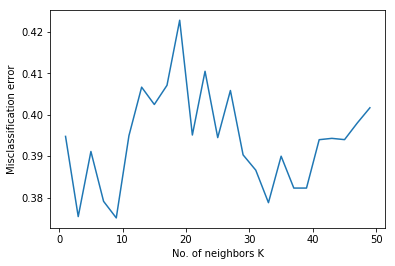

In [2116]:
plt.plot(neighbors, MSE)
plt.xlabel('No. of neighbors K')
plt.ylabel('Misclassification error')
plt.show()